In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Reading the file
df = pd.read_csv("goodreads.csv", encoding = "ISO-8859-1", engine='python')



In [35]:
#Reading the first five records
df.head()

,Id,title,genre,Unnamed: 3,authors,Rating,Desc,url
0,1,Harry Potter and the Half-Blood Prince,Fantasy Fiction,NaN,J.K. Rowling,4.57,The war against Voldemort is not going well; e...,https://m.media-amazon.com/images/M/MV5BNzU3ND...
1,2,Harry Potter and the Order of the Phoenix,Fantasy Fiction,NaN,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,https://m.media-amazon.com/images/M/MV5BMTM0NT...
2,3,Harry Potter and the Sorcerer's Stone,Fantasy Fiction,NaN,J.K. Rowling,4.47,Harrys perfectly normal life at number 4 priv...,https://upload.wikimedia.org/wikipedia/en/7/7a...
3,4,Harry Potter and the Chamber of Secrets,Fantasy Fiction,NaN,J.K. Rowling,4.42,Harry Potter is about to start his second year...,https://images.moviesanywhere.com/51d05e3bd56a...
4,5,Harry Potter and the Prisoner of Azkaban,Fantasy Fiction,NaN,J.K. Rowling,4.57,Harry Potter and the Prisoner of Azkaban is th...,https://images.moviesanywhere.com/1da041f4db01...


In [36]:
#Checking the shape of the file
df.shape

(18, 8)

In [37]:
#Exploratory Data Analysis

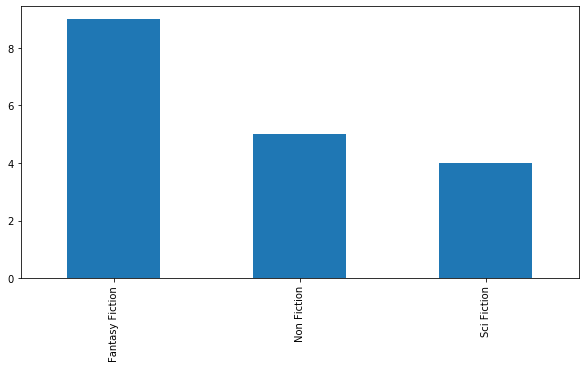

In [38]:
# Genre distribution
df['genre'].value_counts().plot(x = 'genre', y ='count', kind = 'bar', figsize = (10,5)  )

In [39]:
# Printing the book title and description randomly
df['title'] 
df['Desc']

0     The war against Voldemort is not going well; e...
1     There is a door at the end of a silent corrido...
2     Harrys perfectly normal life at number 4 priv...
3     Harry Potter is about to start his second year...
4     Harry Potter and the Prisoner of Azkaban is th...
5     Schools come together for an ultimate competit...
6     Author J. K. Rowling does something amazing wi...
7     The war against Voldemort is not going well; e...
8     Author J. K. Rowling does something amazing wi...
9     Seconds before the Earth is demolished to make...
10    ""The Hitchhiker's Guide to the Galaxy"\n\nSec...
11    "Seconds before the Earth is demolished to mak...
12    "Suppose a good friend calmly told you over a ...
13    Bryson's biggest book, he confronts his greate...
14    In the early fall of 2002, famed travel Writer...
15    A revised and updated edition of a humorous pr...
16    Despite the fact that Australia harbors more t...
17    After living in Britain for two decades, B

In [40]:
#Book description — Word count distribution

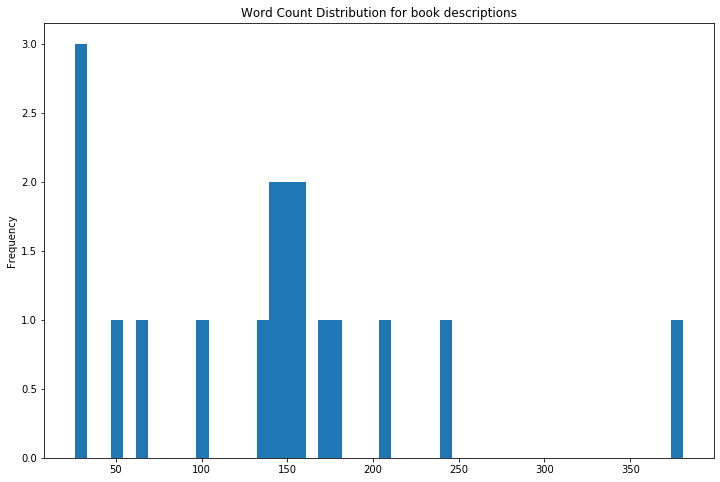

In [41]:
# Calculating the word count for book description
df['word_count'] = df['Desc'].apply(lambda x: len(str(x).split()))
# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

In [42]:
#import nltk
#nltk.download()
#It will open a page for corpus download.Download all the packages

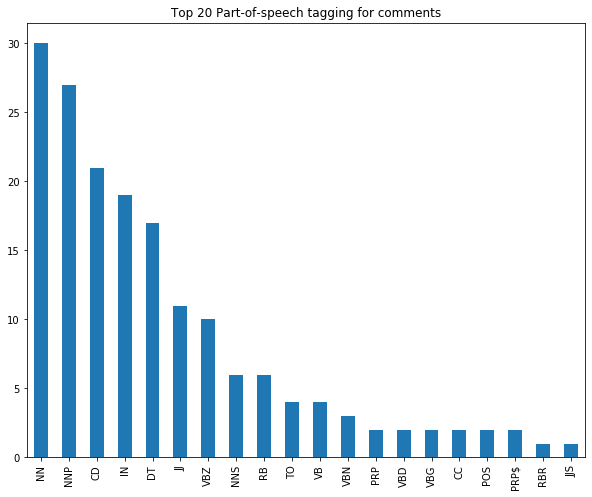

In [43]:
#The distribution of top part-of-speech tags in the book descriptions
from textblob import TextBlob
blob = TextBlob(str(df['Desc']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

In [44]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

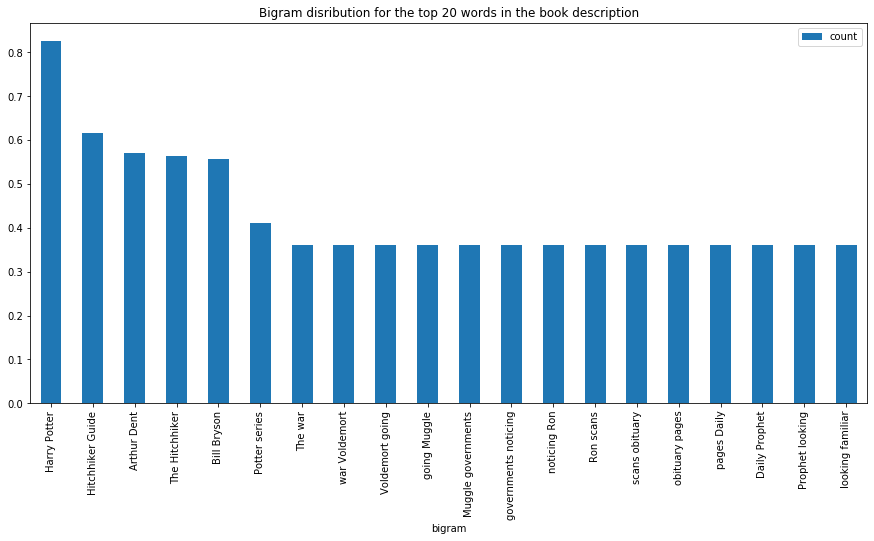

In [45]:
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

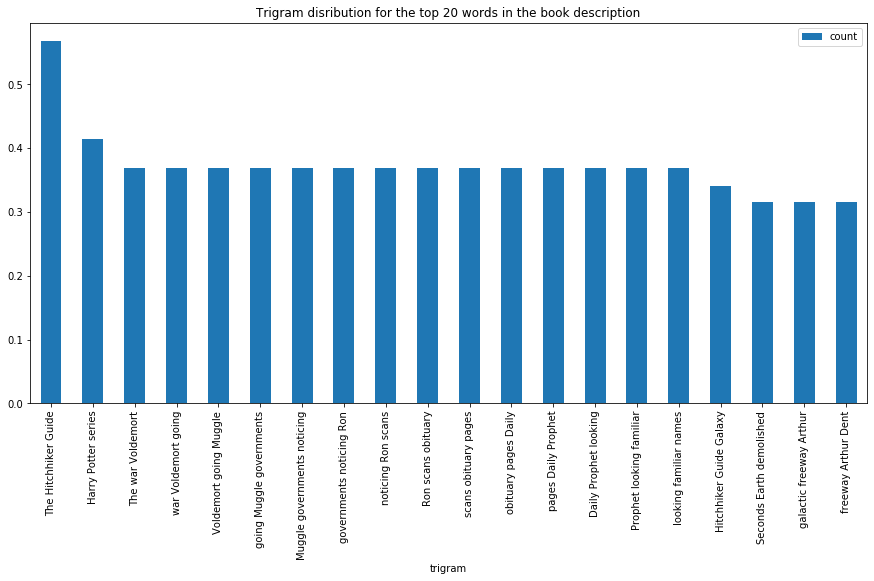

In [46]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [47]:
#Text Preprocessing
#Cleaning the book description.
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['Desc'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
#Recommendation based on book title
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title, genre):
    
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]
# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 5 most similar books 
    sig = sig[1:6]
# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title', 'url']].iloc[movie_indices]
       
    # It reads the top 5 recommend book url and print the images
    
    for i in rec['url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


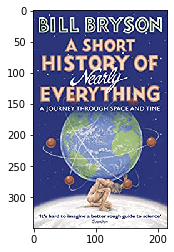

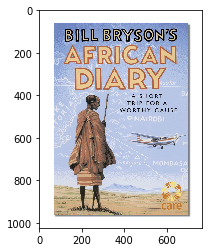

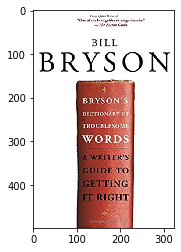

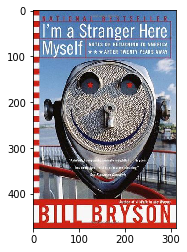

In [50]:
recommend("In a Sunburned Country", "Non Fiction")